# Financial Planning with APIs and Simulations

In [50]:
# Imported the required libraries and dependencies
import os
import requests
import json
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [51]:
# Loaded the environment variables from the .env file
load_dotenv()

True

### Part 1: Created a Financial Planner for Emergencies

In [52]:
# Current number of coins for each cryptocurrency asset held in the portfolio.
btc_coins = 1.2
eth_coins = 5.3

In [58]:
# The monthly amount of the member's household income
monthly_income = 12000

In [54]:
# The Free Crypto API Call endpoint URLs for the held cryptocurrency assets
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [59]:
# Used the Python requests library, made an API call to access the current price of BTC
btc_response = requests.get(btc_url).json()

# Used the json.dumps function to review the response data from the API call
print(json.dumps(btc_response, indent=3, sort_keys=True))

{
   "data": {
      "1": {
         "circulating_supply": 18860156,
         "id": 1,
         "last_updated": 1635715655,
         "max_supply": 21000000,
         "name": "Bitcoin",
         "quotes": {
            "USD": {
               "market_cap": 1153102723955,
               "percent_change_1h": 0.247894085278438,
               "percent_change_24h": -0.761032335011315,
               "percent_change_7d": -0.623383956123934,
               "percentage_change_1h": 0.247894085278438,
               "percentage_change_24h": -0.761032335011315,
               "percentage_change_7d": -0.623383956123934,
               "price": 61188.0,
               "volume_24h": 32821877369
            }
         },
         "rank": 1,
         "symbol": "BTC",
         "total_supply": 18860156,
         "website_slug": "bitcoin"
      }
   },
   "metadata": {
      "error": null,
      "num_cryptocurrencies": 3105,
      "timestamp": 1635715655
   }
}


In [57]:
# Used the Python requests library, made an API call to access the current price ETH
eth_response = requests.get(eth_url).json()

# Used the json.dumps function to review the response data from the API call
print(json.dumps(eth_response, indent=3, sort_keys=True))

{
   "data": {
      "1027": {
         "circulating_supply": 118155996,
         "id": 1027,
         "last_updated": 1635715703,
         "max_supply": 0,
         "name": "Ethereum",
         "quotes": {
            "USD": {
               "market_cap": 506099408000,
               "percent_change_1h": 0.229707963203813,
               "percent_change_24h": -0.467608742131337,
               "percent_change_7d": 2.56124929832018,
               "percentage_change_1h": 0.229707963203813,
               "percentage_change_24h": -0.467608742131337,
               "percentage_change_7d": 2.56124929832018,
               "price": 4286.49,
               "volume_24h": 18803351756
            }
         },
         "rank": 2,
         "symbol": "ETH",
         "total_supply": 118155996,
         "website_slug": "ethereum"
      }
   },
   "metadata": {
      "error": null,
      "num_cryptocurrencies": 3105,
      "timestamp": 1635715703
   }
}


In [60]:
# Navigated the BTC response object to access the current price of BTC
btc_price = btc_response['data']['1']['quotes']['USD']['price']

# Printed the current price of BTC
print(f'The current price of Bitcoin is {btc_price}')

The current price of Bitcoin is 61188.0


In [61]:
# Navigated the BTC response object to access the current price of ETH
eth_price = eth_response['data']['1027']['quotes']['USD']['price']

# Printed the current price of ETH
print(f'The current price of Ethereum is {eth_price}')

The current price of Ethereum is 4286.49


In [62]:
# Calculated the current value of the member's BTC holding 
btc_value = btc_price * btc_coins

# Printed current value of member's holding in BTC
print(f'The current value of the Bitcoin portfolio is ${btc_value:.2f}')

The current value of the Bitcoin portfolio is $73425.60


In [63]:
# Calculated the current value of the member's ETH holding 
eth_value = eth_price * eth_coins

# Printed current value of member's holding in ETH
print(f'The current value of the Ethereum portfolio is ${eth_value:.2f}')

The current value of the Ethereum portfolio is $22718.40


In [65]:
# Calculated the total value of the cryptocurrency wallet
total_crypto_wallet = btc_value + eth_value

# Printed current cryptocurrency wallet balance
print(f'The current value of the entire cryptocurrency wallet is ${total_crypto_wallet:.2f}')

The current value of the entire cryptocurrency wallet is $96144.00


In [66]:
# Current amount of shares held in both the stock (SPY) and bond (AGG) portion of the portfolio.
spy_shares = 110
agg_shares = 200


In [67]:
# Set the variables for the Alpaca API and secret keys
alpaca_api = os.getenv('ALPACA_API_KEY')

alpaca_secret = os.getenv('ALPACA_SECRET_KEY')

# Created Alpaca API REST object
alpaca = tradeapi.REST(
    alpaca_api,
    alpaca_secret,
    api_version='v2'
)

In [104]:
# Set the tickers for both the bond and stock portion of the portfolio
tickers = ['AGG','SPY']

# Set timeframe 
timeframe = '1D'

# Formated current date as ISO format
start_date= pd.Timestamp('2021-10-26', tz= "America/New_York").isoformat()
end_date= pd.Timestamp('2021-10-26', tz= "America/New_York").isoformat()

In [105]:
# Used the Alpaca get_barset function to get current closing prices the portfolio
closing_prices_df = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
).df

# Review first 5 rows of the Alpaca DataFrame
closing_prices_df.head()

AGG                                     SPY  \
                             open    high     low   close   volume   open   
time                                                                        
2021-10-26 00:00:00-04:00  114.25  114.38  114.11  114.37  5284755  457.2   

                                                             
                             high     low   close    volume  
time                                                         
2021-10-26 00:00:00-04:00  458.49  455.56  455.97  49865704

In [70]:
# Accessed the closing price for AGG from the Alpaca DataFrame
# Converted the value to a floating point number
agg_close_price = float(closing_prices_df['AGG']['close'])

# Printed the AGG closing price
print(f'The closing price for AGG is ${agg_close_price}')

The closing price for AGG is $114.37


In [71]:
# Accessed the closing price for SPY from the Alpaca DataFrame
# Converted the value to a floating point number
spy_close_price = float(closing_prices_df['SPY']['close'])

# Printed the SPY closing price
print(f'The closing price for SPY is ${spy_close_price}') 

The closing price for SPY is $455.97


In [72]:
# Calculated the current value of the bond portion of the portfolio
agg_value = agg_close_price * agg_shares

# Printed the current value of the bond portfolio
print(f'The current value of the AGG bond potfolio is ${agg_value:.2f}')

The current value of the AGG bond potfolio is $22874.00


In [73]:
# Calculated the current value of the stock portion of the portfolio
spy_value = spy_close_price * spy_shares

# Printed the current value of the stock portfolio
print(f'The current value of the SPY stock portfolio is ${spy_value:.2f}')

The current value of the SPY stock portfolio is $50156.70


In [74]:
# Calculated the total value of the stock and bond portion of the portfolio
total_stocks_bonds = agg_value + spy_value

# Printed the current balance of the stock and bond portion of the portfolio
print(f'The total current value of the stock and bond portion of the portfolio is ${total_stocks_bonds:.2f}')

The total current value of the stock and bond portion of the portfolio is $73030.70


In [76]:
# Calculated the current value of the entire savings portfolio
total_portfolio = total_crypto_wallet + total_stocks_bonds

# Printed current total value of the member's entire savings portfolio
print(f'The current total value of the entire savings portfolio is ${total_portfolio:.2f}')

The current total value of the entire savings portfolio is $169174.70


In [80]:
# Consolidated financial assets data into a Python list
savings_data = [total_crypto_wallet, total_stocks_bonds]

# Review the Python list savings_data
display(savings_data)

[96143.99699999999, 73030.70000000001]

In [82]:
# Created a Pandas DataFrame called savings_df 
savings_df = pd.DataFrame(savings_data, columns=['Amount'], index=['Crypto', 'Stock/Bond'])

# Display the savings_df DataFrame
display(savings_df)

,Amount
Crypto,96143.997
Stock/Bond,73030.700


<AxesSubplot:title={'center':"Composition of Member's Portfolio"}, ylabel='Amount'>

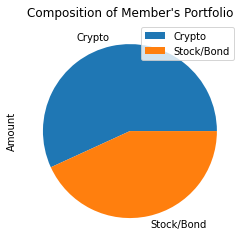

In [83]:
# Plotted the total value of the member's portfolio (crypto and stock/bond) in a pie chart
savings_df.plot.pie(y="Amount", title="Composition of Member's Portfolio")

In [84]:
# Created a variable named emergency_fund_value
# Emergancy funds are typically 3months of income
emergency_fund_value = monthly_income * 3

# Review value needed for emergancy fund
print(emergency_fund_value)

36000


In [85]:
# Evaluated the possibility of creating an emergency fund with 3 conditions:
if total_portfolio > emergency_fund_value:
    print('Congratulations! You have enough money in your portfolio to create an emergancy fund.')
elif total_portfolio == emergency_fund_value:
    print('Your total portfolio is equal to 3 months of your income. Congratulations on reaching this important finacial goal')
else:
    amount_short=emergency_fund_value - total_portfolio
    print(f"Sorry, you do not have enough money in your portfolio to create an emergancy fund. You are ${amount_short:.2f} away from meeting this goal.")

Congratulations! You have enough money in your portfolio to create an emergancy fund.


### Part 2: Created a Financial Planner for Retirement

In [86]:
# Set start and end dates of 3 years back from current date 
start_date= pd.Timestamp('2018-10-26', tz= "America/New_York").isoformat()
end_date= pd.Timestamp('2021-10-26', tz= "America/New_York").isoformat()

# Set number of rows to 1000 to retrieve the maximum amount of rows
limit_rows=1000

In [87]:
# Used the Alpaca get_barset function to make the API call to get the 3 years worth of pricing data
three_year_pricing = alpaca.get_barset(
    tickers,
    timeframe,
    start=start_date,
    end=end_date,
    limit=limit_rows
).df

# Display both the first and last five rows of the DataFrame
display(three_year_pricing.head())
display(three_year_pricing.tail())

AGG                                       \
                             open    high     low    close      volume   
time                                                                     
2018-10-26 00:00:00-04:00  104.88  105.05  104.87  104.915   4411985.0   
2018-10-29 00:00:00-04:00  104.86  104.89  104.72  104.790   3599179.0   
2018-10-30 00:00:00-04:00  104.68  104.78  104.64  104.650   2246561.0   
2018-10-31 00:00:00-04:00  104.50  104.70  104.50  104.580  11670445.0   
2018-11-01 00:00:00-04:00  104.22  104.41  104.21  104.350   6974347.0   

                              SPY                                     
                             open    high     low   close     volume  
time                                                                  
2018-10-26 00:00:00-04:00  265.92  271.00  262.29  265.29  161147868  
2018-10-29 00:00:00-04:00  268.78  270.25  259.85  263.80  120705901  
2018-10-30 00:00:00-04:00  263.67  268.12  263.12  267.81  122643325  
2018-10-31 00:00:00-04:00  270.65  273.23  270.12  270.69   97427146  
2018-11-01 00:00:00-04:00  271.62  273.73  270.38  273.51   72100016

AGG                                         \
                             open      high       low   close     volume   
time                                                                       
2021-10-20 00:00:00-04:00  114.17  114.2900  114.0600  114.07  5881766.0   
2021-10-21 00:00:00-04:00  114.01  114.0400  113.8423  113.85  4741154.0   
2021-10-22 00:00:00-04:00  113.97  114.1399  113.8950  114.07  3309637.0   
2021-10-25 00:00:00-04:00  114.06  114.2700  114.0600  114.17  7088133.0   
2021-10-26 00:00:00-04:00  114.25  114.3800  114.1100  114.37  5284755.0   

                              SPY                                     
                             open     high     low   close    volume  
time                                                                  
2021-10-20 00:00:00-04:00  451.13  452.732  451.01  452.39  41594298  
2021-10-21 00:00:00-04:00  451.76  453.829  451.31  453.61  33945007  
2021-10-22 00:00:00-04:00  453.13  454.670  451.05  453.13  50771701  
2021-10-25 00:00:00-04:00  454.28  455.900  452.39  455.48  37918548  
2021-10-26 00:00:00-04:00  457.20  458.490  455.56  455.97  49865704

In [114]:
# Configured the Monte Carlo simulation to forecast 30 years cumulative returns
# The weights split 40% to AGG and 60% to SPY. Ran 500 samples.
MC_30_year = MCSimulation(
    portfolio_data = three_year_pricing,
    weights=[.4,.6],
    num_simulation=500,
    num_trading_days=252*30
)

# Review the simulation input data
MC_30_year.portfolio_data.head()

AGG                                       \
                             open    high     low    close      volume   
time                                                                     
2018-10-26 00:00:00-04:00  104.88  105.05  104.87  104.915   4411985.0   
2018-10-29 00:00:00-04:00  104.86  104.89  104.72  104.790   3599179.0   
2018-10-30 00:00:00-04:00  104.68  104.78  104.64  104.650   2246561.0   
2018-10-31 00:00:00-04:00  104.50  104.70  104.50  104.580  11670445.0   
2018-11-01 00:00:00-04:00  104.22  104.41  104.21  104.350   6974347.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2018-10-26 00:00:00-04:00          NaN  265.92  271.00  262.29  265.29   
2018-10-29 00:00:00-04:00    -0.001191  268.78  270.25  259.85  263.80   
2018-10-30 00:00:00-04:00    -0.001336  263.67  268.12  263.12  267.81   
2018-10-31 00:00:00-04:00    -0.000669  270.65  273.23  270.12  270.69   
2018-11-01 00:00:00-04:00    -0.002199  271.62  273.73  270.38  273.51   

                                                   
                              volume daily_return  
time                                               
2018-10-26 00:00:00-04:00  161147868          NaN  
2018-10-29 00:00:00-04:00  120705901    -0.005616  
2018-10-30 00:00:00-04:00  122643325     0.015201  
2018-10-31 00:00:00-04:00   97427146     0.010754  
2018-11-01 00:00:00-04:00   72100016     0.010418

In [115]:
# Ran the Monte Carlo simulation to forecast 30 years cumulative returns
MC_30_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/thomas/Desktop/GitRepo/Financial_Planning_APIs_and_Simulations/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.010034,0.995738,0.994781,1.008504,1.008828,0.988771,1.005202,1.005277,0.995327,0.995714,...,1.008038,1.014369,0.998855,0.992801,0.998642,0.994378,0.992545,1.001316,1.008339,0.988595
2,0.999594,0.994115,0.987213,0.998974,1.014209,0.975638,1.012459,1.007812,0.987549,0.992228,...,1.011766,1.021309,1.013564,1.000579,0.989859,0.978588,0.980028,0.994710,1.018353,0.987174
3,1.005004,0.989896,0.995794,1.004071,0.998735,0.962572,1.014723,0.995515,0.993443,0.988282,...,1.008871,1.018100,1.018256,0.992090,0.982708,0.979162,0.978830,1.011345,1.011083,0.974698
4,1.009101,0.996595,0.987418,1.007660,0.989444,0.956533,1.013819,0.992927,0.995309,0.972104,...,0.999184,1.008767,1.003350,0.984920,0.980959,0.993520,0.987243,1.014396,1.035678,0.970919
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,27.918953,27.468735,264.484649,83.810997,61.038319,36.783831,37.474834,59.699853,5.188975,59.898409,...,238.313994,50.786049,69.910710,34.715130,59.095671,20.132542,40.598600,39.789465,13.459476,9.025418
7557,27.686746,27.117270,265.090323,83.464551,61.205221,37.101072,37.398601,59.600832,5.193179,60.159336,...,239.565111,50.491402,67.893358,34.529925,59.018688,20.059015,40.625028,40.245232,13.505910,9.016571
7558,27.786723,27.292118,262.413376,84.019978,62.371611,37.543458,37.536870,58.850209,5.261551,60.601777,...,236.334214,50.380476,67.771487,34.450716,58.871170,19.991928,40.727506,40.081127,13.576699,9.102234
7559,27.806500,27.719692,261.958517,84.334993,61.843384,37.826164,37.852603,59.169012,5.203657,60.968896,...,234.696144,49.935141,67.416874,34.596583,58.379447,19.892820,40.841668,39.850505,13.444343,9.254770


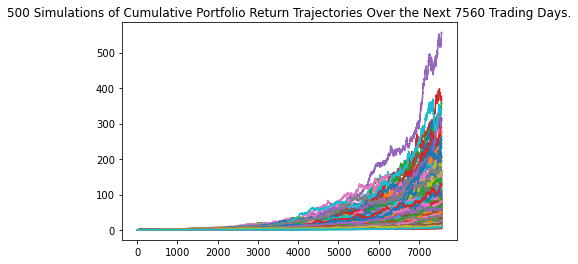

In [116]:
# Visualized the 30-year Monte Carlo simulation by creating an overlay line plot
MC_30_line_plot = MC_30_year.plot_simulation()

#### Step 3: Plot the probability distribution of the Monte Carlo simulation.

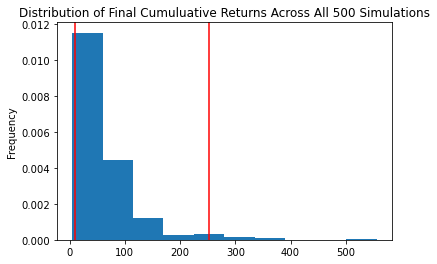

In [117]:
# Visualized the probability distribution of the 30-year Monte Carlo simulation by plotting a histogram
MC_30_dist_plot = MC_30_year.plot_distribution()

In [118]:
# Generated summary statistics from the 30-year Monte Carlo simulation results
MC_30_summary = MC_30_year.summarize_cumulative_return()


# Review the 30-year Monte Carlo summary statistics
print(MC_30_summary)

count           500.000000
mean             63.497277
std              60.765230
min               4.558753
25%              26.377654
50%              45.334265
75%              75.344662
max             555.610203
95% CI Lower      9.969785
95% CI Upper    252.122752
Name: 7560, dtype: float64


In [119]:
# Printed the current balance of the stock and bond portion of the members portfolio
print(f'The current balance of the stock and bond portion of the portfolio is ${total_stocks_bonds:.2f}')


The current balance of the stock and bond portion of the portfolio is $73030.70


In [129]:
# Used the lower and upper `95%` confidence intervals 
# to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_thirty_cumulative_return = '{:.2f}'.format(round(MC_30_summary[8] * total_stocks_bonds, 2))
ci_upper_thirty_cumulative_return =  '{:.2f}'.format(round(MC_30_summary[9] * total_stocks_bonds, 2))

# Printed the results of calculations
print(f'There is a 95% chance that with the current portfolio value, that if invested in a portfolio with a 60/40 split of stocks to bonds over the next 30years will end within the range of ${ci_lower_thirty_cumulative_return} and ${ci_upper_thirty_cumulative_return}.')

There is a 95% chance that with the current portfolio value, that if invested in a portfolio with a 60/40 split of stocks to bonds over the next 30years will end within the range of $728100.36 and $18412701.09.


In [121]:
# Configured a Monte Carlo simulation to forecast 10 years cumulative returns
# The weights split 20% to AGG and 80% to SPY. Ran 500 samples.
MC_10_year = MCSimulation(
    portfolio_data = three_year_pricing,
    weights=[.2,.8],
    num_simulation=500,
    num_trading_days=252*10
)

# Review the simulation input data
MC_10_year.portfolio_data.head()

AGG                                       \
                             open    high     low    close      volume   
time                                                                     
2018-10-26 00:00:00-04:00  104.88  105.05  104.87  104.915   4411985.0   
2018-10-29 00:00:00-04:00  104.86  104.89  104.72  104.790   3599179.0   
2018-10-30 00:00:00-04:00  104.68  104.78  104.64  104.650   2246561.0   
2018-10-31 00:00:00-04:00  104.50  104.70  104.50  104.580  11670445.0   
2018-11-01 00:00:00-04:00  104.22  104.41  104.21  104.350   6974347.0   

                                           SPY                          \
                          daily_return    open    high     low   close   
time                                                                     
2018-10-26 00:00:00-04:00          NaN  265.92  271.00  262.29  265.29   
2018-10-29 00:00:00-04:00    -0.001191  268.78  270.25  259.85  263.80   
2018-10-30 00:00:00-04:00    -0.001336  263.67  268.12  263.12  267.81   
2018-10-31 00:00:00-04:00    -0.000669  270.65  273.23  270.12  270.69   
2018-11-01 00:00:00-04:00    -0.002199  271.62  273.73  270.38  273.51   

                                                   
                              volume daily_return  
time                                               
2018-10-26 00:00:00-04:00  161147868          NaN  
2018-10-29 00:00:00-04:00  120705901    -0.005616  
2018-10-30 00:00:00-04:00  122643325     0.015201  
2018-10-31 00:00:00-04:00   97427146     0.010754  
2018-11-01 00:00:00-04:00   72100016     0.010418

In [122]:
# Ran the Monte Carlo simulation to forecast 10 years cumulative returns
MC_10_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/thomas/Desktop/GitRepo/Financial_Planning_APIs_and_Simulations/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000437,1.008110,1.007843,0.995897,0.996737,0.989252,1.006924,0.994123,0.994250,1.007046,...,1.019029,0.989173,1.019199,1.011598,1.016001,0.998998,0.999873,0.995801,0.979067,1.002295
2,0.989378,1.002594,0.993879,0.995077,1.029914,0.996510,1.003366,0.967747,0.990255,0.989283,...,1.014423,1.004594,1.014633,0.994781,1.020808,0.994616,0.988076,0.991809,0.959681,0.997259
3,1.006788,0.988746,0.979254,1.001338,1.019866,1.003688,0.992232,0.956560,0.988596,0.986782,...,1.011517,1.001288,1.023896,1.015072,0.989002,0.974805,0.981946,0.996650,0.969493,1.001331
4,1.018503,0.982511,0.976294,1.023308,1.029888,1.008189,0.984300,0.942189,0.995864,0.992968,...,1.006741,1.010186,1.017754,1.017444,1.001934,0.990519,0.999307,0.996025,0.970842,1.012738
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.975126,4.009597,3.305437,2.982005,2.060155,3.971104,4.660787,2.637527,9.644136,7.496955,...,2.762307,11.073841,11.480381,2.594439,3.878019,1.300620,2.227850,10.962280,1.421220,2.639608
2517,2.947680,3.997396,3.341917,3.022578,2.040752,3.979947,4.741762,2.603693,9.733173,7.557670,...,2.772927,11.080938,11.362058,2.647508,3.894300,1.295885,2.211248,10.781615,1.412697,2.656378
2518,2.948148,3.991357,3.323534,2.977378,2.066289,3.943926,4.741148,2.553866,9.796227,7.599403,...,2.812125,10.900210,11.367135,2.691362,3.828453,1.272015,2.183828,10.817877,1.424544,2.661615
2519,2.929327,3.938270,3.369445,2.948178,2.072332,3.965363,4.680350,2.485928,9.941281,7.684243,...,2.826653,10.981802,11.491799,2.720583,3.736231,1.267685,2.236305,10.843159,1.425611,2.673975


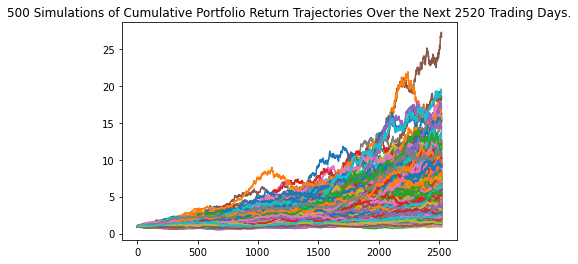

In [123]:
# Visualized the 10-year Monte Carlo simulation by creating an overlay line plot
MC_10_line_plot = MC_10_year.plot_simulation()

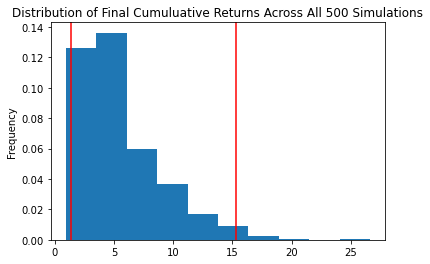

In [130]:
# Visualized the probability distribution of the 10-year Monte Carlo simulation by plotting a histogram
MC_10_dist_plot = MC_10_year.plot_distribution()

In [131]:
# Generated summary statistics from the 10-year Monte Carlo simulation results
MC_10_summary = MC_10_year.summarize_cumulative_return()

# Review the 10-year Monte Carlo summary statistics
display(MC_10_summary)

count           500.000000
mean              5.577799
std               3.489067
min               0.918016
25%               3.189292
50%               4.632575
75%               7.247312
max              26.630745
95% CI Lower      1.362197
95% CI Upper     15.300068
Name: 2520, dtype: float64

In [132]:
# Printed the current balance of the stock and bond portion of the members portfolio
print(f'The current balance of the stock and bond portion of the portfolio is ${total_stocks_bonds:.2f}')

The current balance of the stock and bond portion of the portfolio is $73030.70


In [133]:
# Used the lower and upper `95%` confidence intervals
# to calculate the range of the possible outcomes for the current stock/bond portfolio
ci_lower_ten_cumulative_return = '{:.2f}'.format(round(MC_10_summary[8] * total_stocks_bonds, 2))
ci_upper_ten_cumulative_return =  '{:.2f}'.format(round(MC_10_summary[9] * total_stocks_bonds, 2))

# Printed the results of calculations
print(f'There is a 95% chance that with the current portfolio value, that if invested in a portfolio with a 80/20 split of stocks to bonds over the next 10years will end within the range of ${ci_lower_ten_cumulative_return} and ${ci_upper_ten_cumulative_return}.')

There is a 95% chance that with the current portfolio value, that if invested in a portfolio with a 80/20 split of stocks to bonds over the next 10years will end within the range of $99482.21 and $1117374.68.


### Retirement Analysis

While there are many finacial factors when it comes to deciding retirement. The analysis shows that weighting the portfolio more heavily to stocks over bonds (80/20) over 10years will not allow the portfolio holder to retire with nearly as much as they would with a more balanced stock to bond portfolio (60/40) and waiting 30years.